In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test =  pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission =  pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Saleprice column is our target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

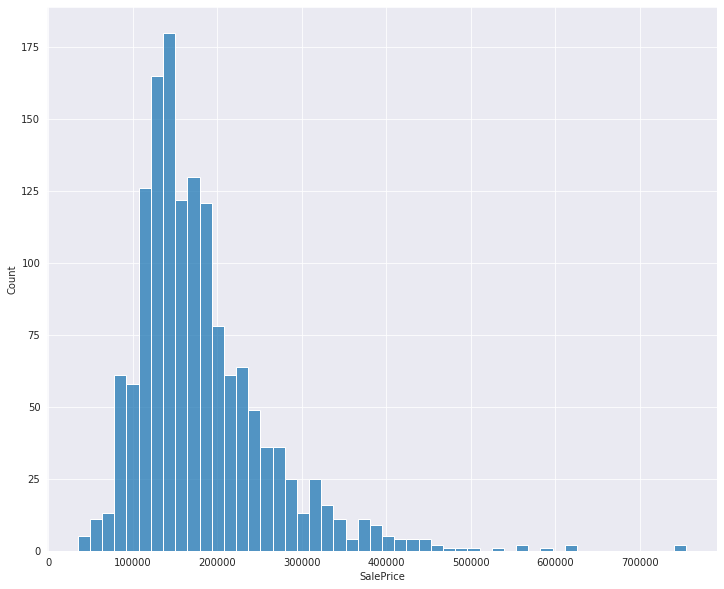

In [6]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=train, x="SalePrice", bins=50,cbar=True)

The SalePrice is right skewed and is not normally distributed , therefore we need to adjust it

In [7]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

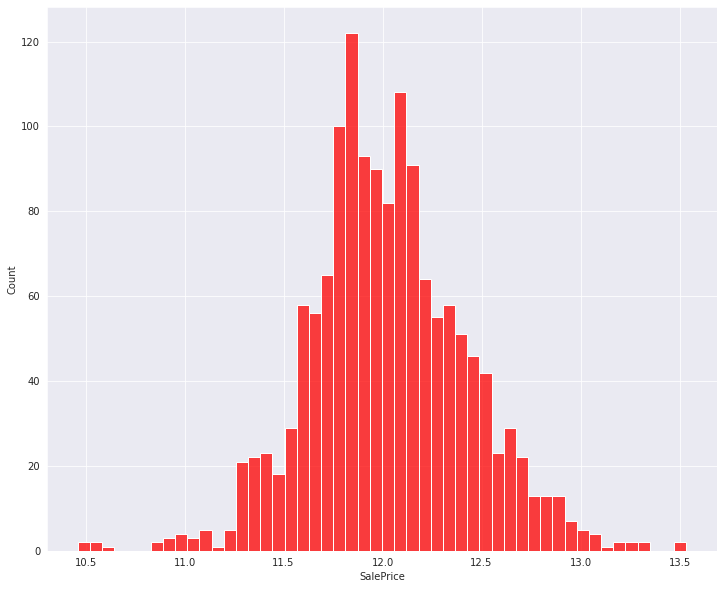

In [8]:
#Applying log transformation to remove skewness and make target variable normally distributed
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=train, x="SalePrice", bins=50,cbar=True,color="red")

Now it is normally distributed

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

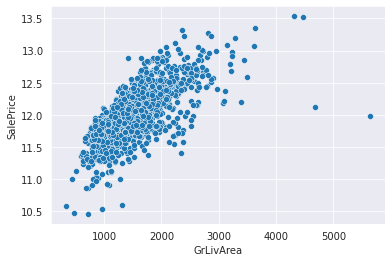

In [9]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [10]:
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,0)
train.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

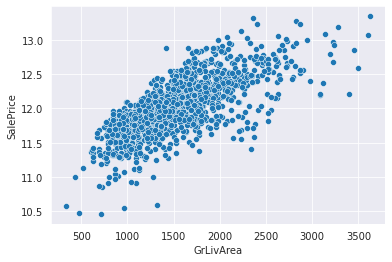

In [11]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [12]:
#Here we list the correlation between the target and other features from the highest to the negative ones
corr=train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.72
GarageCars       0.68
GarageArea       0.66
TotalBsmtSF      0.64
1stFlrSF         0.61
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
GarageYrBlt      0.54
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.38
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.33
HalfBath         0.31
2ndFlrSF         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.20
ScreenPorch      0.12
MoSold           0.06
3SsnPorch        0.06
PoolArea         0.04
BsmtFinSF2       0.01
BsmtHalfBath    -0.01
MiscVal         -0.02
YrSold          -0.03
OverallCond     -0.04
LowQualFinSF    -0.04
MSSubClass      -0.08
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64


It seem the overall quality has the highest positive correlation with the target

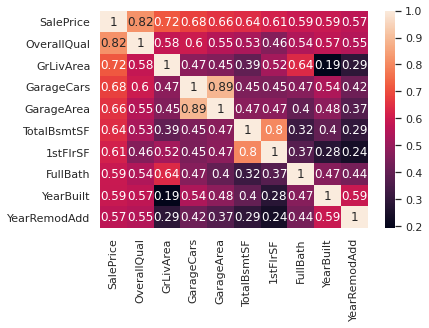

In [13]:
import numpy as np
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

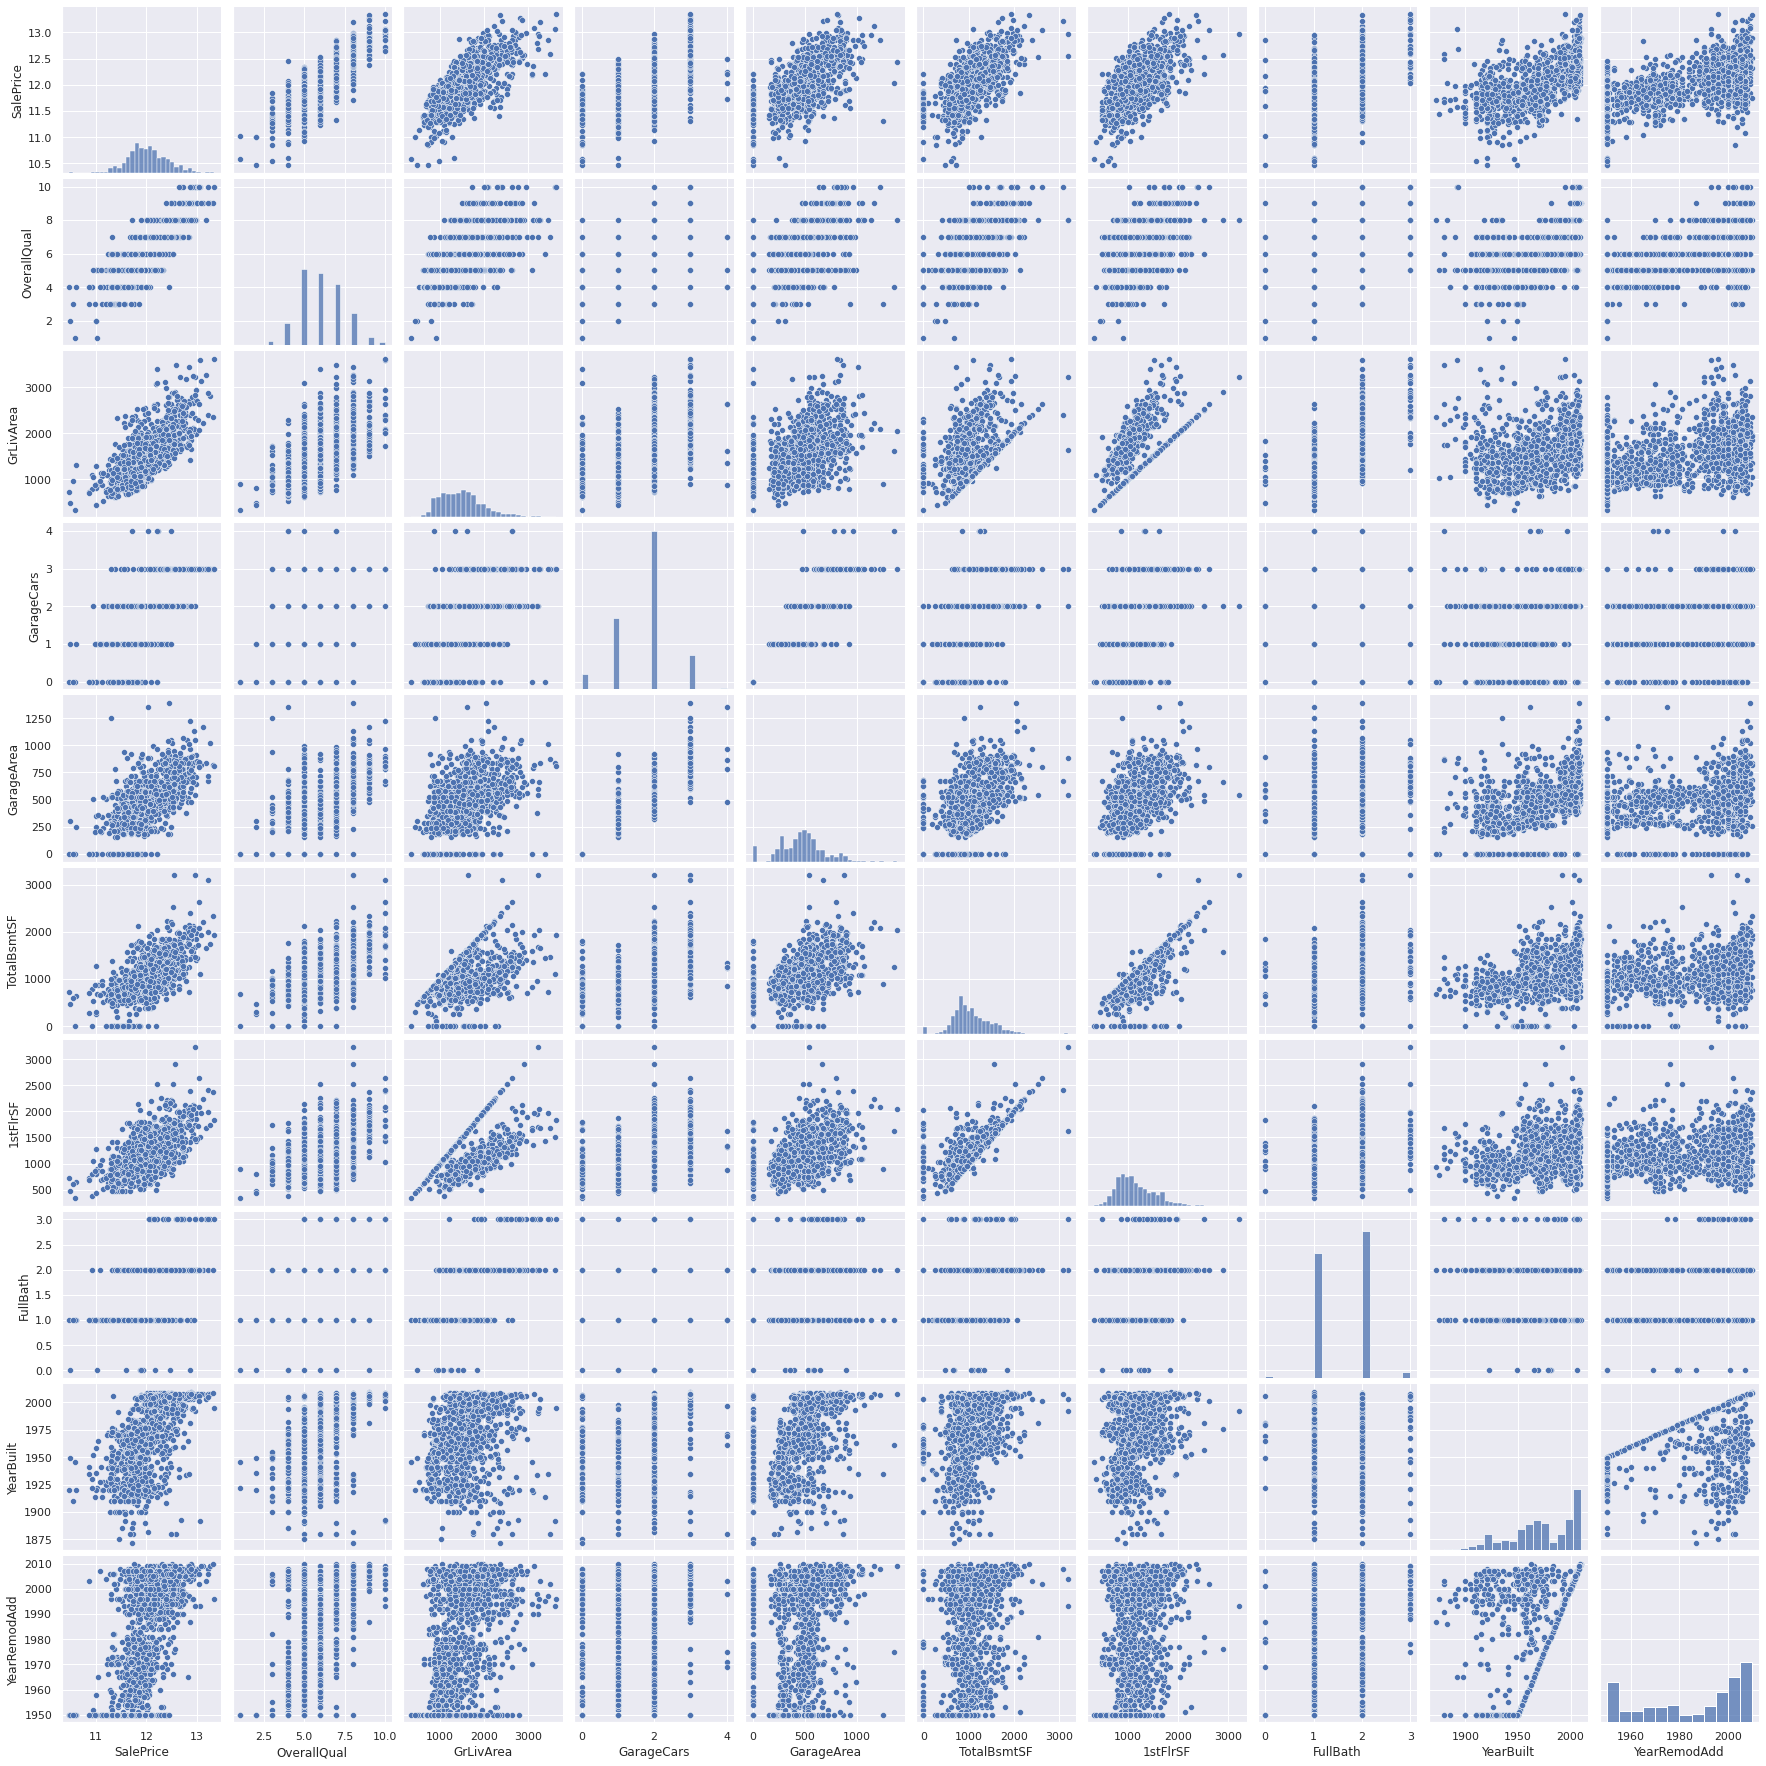

In [14]:
sns.pairplot(train[corr['SalePrice'].head(10).index])

In [15]:
trainrow=train.shape[0]
testrow=test.shape[0]

In [16]:
y = train['SalePrice'].copy()
testids = test['Id'].copy()
data = pd.concat((train,test)).reset_index(drop=True)
data = data.drop('SalePrice',1)
data = data.drop('Id',axis=1)


**MISSING DATA**

In [17]:
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
dtype: int64

In [18]:
# PoolQC
data['PoolQC']=data['PoolQC'].fillna('NA')
print(data['PoolQC'].unique())

# MiscFeature
data['MiscFeature']=data['MiscFeature'].fillna('NA')
print(data['MiscFeature'].unique())

# Alley
data['Alley']=data['Alley'].fillna('NA')
print(data['Alley'].unique())

# Fence
data['Fence']=data['Fence'].fillna('NA')
print(data['Fence'].unique())

# FireplaceQu
data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
print(data['FireplaceQu'].unique())

# GarageCond
data['GarageCond']=data['GarageCond'].fillna('NA')
print(data['GarageCond'].unique())

# GarageQual
data['GarageQual']=data['GarageQual'].fillna('NA')
print(data['GarageQual'].unique())

# GarageFinish
data['GarageFinish']=data['GarageFinish'].fillna('NA')
print(data['GarageFinish'].unique())

['NA' 'Ex' 'Fa' 'Gd']
['NA' 'Shed' 'Gar2' 'Othr' 'TenC']
['NA' 'Grvl' 'Pave']
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
['RFn' 'Unf' 'Fin' 'NA']


In [19]:
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [20]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [21]:
# LotFrontage
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [22]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].dropna().index[0])
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].dropna().index[0])
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().index[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().index[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().index[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().index[0])

In [23]:
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

**FEATURE ENGINEERING**

In [24]:
data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [25]:
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)

In [26]:
data = pd.get_dummies(data)

In [27]:
X = data[:len(train)] #converted into train data
test = data[len(train):] #test data
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',test.shape)#test set shape
print(y.shape)

Train Data Shape: (1456, 324)
Test Data Shape: (1459, 324)
(1456,)


TRAINING AND TESTING MACHINE LEARNING MODELS

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1092, 324)
(364, 324)
(1092,)
(364,)


In [29]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(X_train,y_train)
print(reg_liner.score(X_train,y_train))
predictions1 = reg_liner.predict(X_test)
print(predictions1)

0.9509369916662462
[12.21210457 12.54345609 12.85605674 12.49388187 12.55791962 12.36327238
 13.02100056 11.9798318  11.87012526 11.80058355 12.73016721 12.6561992
 12.07317714 12.38805958 12.28116754 12.14548391 11.93742132 12.39817052
 11.59365023 12.74277009 12.12179169 11.9280493  11.54972865 11.75615839
 12.60677844 11.99533623 12.0947092  11.89534694 12.62790068 12.48913319
 12.18852157 12.11077637 12.30357465 12.14209798 12.4816522  11.69749595
 11.79366429 11.03050658 11.94627373 11.9501093  12.20754996 11.86742776
 12.0170885  11.94954537 12.26478908 12.05229029 11.48020201 11.86188319
 11.55813583 12.06310899 11.91689912 12.39697986 12.59730205 12.12603931
 11.94100842 11.66179781 12.44150652 12.69571315 11.69082631 11.60456971
 11.71133954 12.07095398 11.7142324  11.83899458 12.05069636 12.15877803
 11.86625559 11.9585706  11.46974911 12.48638839 12.27670512 12.66106975
 11.82601208 12.17029684 12.11180483 12.07349529 11.63491446 11.56317193
 11.51738455 11.6977367  11.96152

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))


0.08521454047230677
0.014212454500139741
0.11921599934631148


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

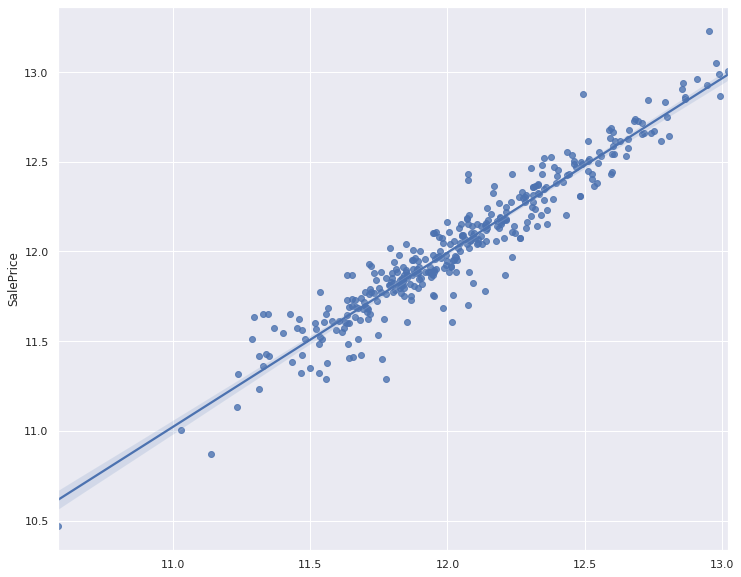

In [31]:
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

**XG BOOST**

In [32]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)], 
             verbose=False)
print(my_model.score(X_train,y_train))

0.999937765318234


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [33]:
predictions =  reg_liner.predict(test)
my_submission = pd.DataFrame({"Id": testids,"SalePrice": np.expm1(predictions) })
my_submission.to_csv('final_submission.csv', index=False , header = True)
my_submission.head()

,Id,SalePrice
0,1461,113937.283726
1,1462,173975.971617
2,1463,181648.048849
3,1464,204942.037213
4,1465,189967.682863
